In [29]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib

# Homework #2
Please turn this homework in as an notebook exported as html, and include it in your GitHub repository.

1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

In [5]:
# probability of rolling snake eye
trials = 100000
countSnake = 0
for i in range(0,trials):
    firstRoll = random.randint(1,6)
    if firstRoll == 1:
        secondRoll = random.randint(1,6)
        if secondRoll == 1:
            countSnake = countSnake + 1
probS = countSnake/trials
probS

# calculated probability of getting Snake eye should be 1/36

0.02805

In [6]:

# probability of rolling two dices sum to 7
trials = 100000
count7 = 0
for i in range(0,trials):
    dice1 = random.randint(1,6)
    dice2 = random.randint(1,6)
    if dice1 + dice2 == 7:
        count7 = count7 + 1

prob7 = count7/trials
prob7


# calculated probability of two dice that have a sum of 7 should be 1/6
# the ratio of getting a sum of 7 should be 6 times more than getting a snake eye.

0.16582

In [7]:
prob = np.array([1/6] * 6)
print(prob)
sum_prob = np.convolve(prob,prob)
sum_prob

# sum_prob is the probability of outcomes for the sum of two dices, calculated by 
# convolving probability of outcomes of two dices.

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

Text(0.5, 1.0, 'Probability of outcomes for sum of two dices')

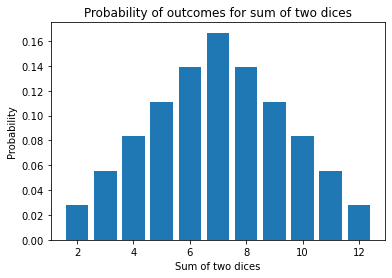

In [8]:
x = np.arange(2,13)
plt.bar(x,sum_prob)
plt.xlabel("Sum of two dices")
plt.ylabel("Probability")
plt.title("Probability of outcomes for sum of two dices")

In [9]:
# analytically the probability of getting 2,3,4,5,6,7,8,9,10,11,12 are 
#1/36, 2/36, 3/36, 4/36/, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36 accordingly.

In [10]:
#problem 3 code
mean = sum(np.arange(2,13) * sum_prob)
print("The mean of all the outcomes of the sum of two dices is",mean)
variance = sum((np.arange(2,13)-mean)**2 * sum_prob)
print("The variance of the distribution is", variance)

The mean of all the outcomes of the sum of two dices is 7.0
The variance of the distribution is 5.833333333333334


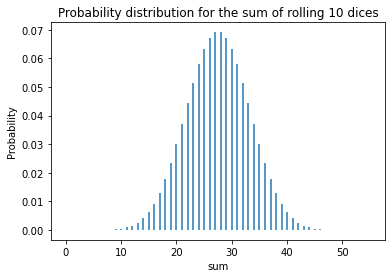

In [14]:
trials = 10
avg_probs = prob
for i in range(trials):
    avg_probs = np.convolve(prob, avg_probs)
plt.xlabel("sum")
plt.ylabel("Probability")
plt.title("Probability distribution for the sum of rolling 10 dices")

plt.vlines(range(len(avg_probs)), 0, avg_probs)

In [12]:
# the over all shape of the graph looks like a gaussian distribution, but it's not exactly gaussian, 
# the distribution will become a better approximation as we increase the number of trials

Text(0.5, 1.0, 'Probability distribution of average of rolling 10 dices')

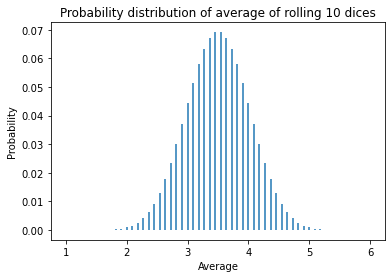

In [15]:
plt.vlines(np.linspace(1, 6, len(avg_probs)), 0, avg_probs)
plt.xlabel("Average")
plt.ylabel("Probability")
plt.title("Probability distribution of average of rolling 10 dices")

In [ ]:
# we set our dice to have equal probability for each number(1/6), in real life situation the distribution
# might not turn out to be perfectly gaussian, but it will be closer as we increase the number of trials.

In [35]:
dist = stats.norm()
n = np.linspace(-10,10,50)


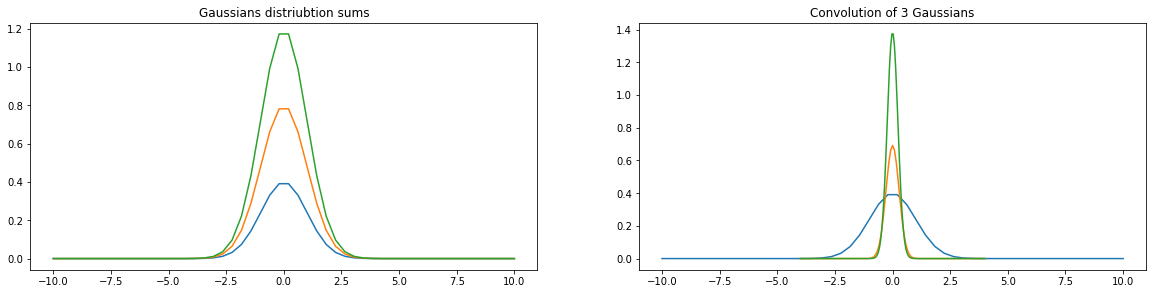

In [36]:
ax_1 = plt.subplot(2,2,1)
matplotlib.rc('figure', figsize=(20, 10))

ax_1.set_title("Gaussians distriubtion sums")
ax_1.plot(n, dist.pdf(n))
ax_1.plot(n, dist.pdf(n) + dist.pdf(n))
ax_1.plot(n, dist.pdf(n) + dist.pdf(n) + dist.pdf(n))

ax_2 = plt.subplot(2, 2, 2)
ax_2.set_title("Convolution of 3 Gaussians")
ax_2.plot(n, dist.pdf(n))
avg = np.convolve(dist.pdf(n), dist.pdf(n))
avg_2 = np.convolve(avg, dist.pdf(n))
ax_2.plot(np.linspace(-4, 4, len(avg)), avg)
ax_2.plot(np.linspace(-4, 4, len(avg_2)), avg_2)



In [ ]:
# By comparing the sum and convolved graphs of three Gaussians, we can see neither adding nor convolving 
# changes the distribution to non-gaussian, and the importance of this finding means that we could reduce
# SD by simply averaging successive independent measurement.